# Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt


# Coleta de dados e visão geral


In [3]:
data = pd.read_csv('datasets/kc_house_data.csv')

In [3]:
#visão geral data
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#verificando valores nulos do dataset (data)
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
# verificando tipo das colunas do dataset (data)
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
data.shape

(21613, 21)

# Transformação dos dados

In [7]:
# suprimindo os numeros de notação científica
pd.set_option('display.float_format',lambda x: '%.2f' % x)

#Transformando a coluna 'date' no tipo datetime do dataset (data).

data['date'] = pd.to_datetime(data['date'])

# adicionando colunas  
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

data['season'] = data['month'].apply(lambda x: 'summer' if (x>=6) & (x<=8) else 
                                                'fall' if (x>=9) & (x<=11) else
                                                'spring' if (x>=3) & (x<=5) else
                                                'winter')
#imovel tem porão
data['basement'] = data['sqft_basement'].apply(lambda x: 'yes' if x>0 else 'no')

#imovel foi renovado
data['renovated'] = data['yr_renovated'].apply(lambda x: 'yes' if x>0 else 'no')

# Adicionando dados via API

In [8]:
#initialize Nomination API
#geolocator = Nominatim(user_agent='geolocalizacao')

#data_reduze= data.head(20)



#for i in range(len(data_reduze)):
#     print("loop: {}/{}".format(i,len(data_reduze)))

# -------make request---------

#     query = str( data_reduze.loc[i, 'lat'] ) + ',' + str( data_reduze.loc[i, 'long'] )
#     response = geolocator.reverse( query )

# ------parse data_reduze----

#     if 'house_number' in response.raw['address']:
#         data_reduze.loc[i, 'house_number'] = response.raw['address']['house_number']
 
#     if 'road' in response.raw['address']:
#         data_reduze.loc[i, 'road'] = response.raw['address']['road']
 
#     if 'city' in response.raw['address']:
#         data_reduze.loc[i, 'city'] = response.raw['address']['city']
 
#     if 'county' in response.raw['address']:
#         data_reduze.loc[i, 'county'] = response.raw['address']['county']
 
#     if 'state' in response.raw['address']:
#         data_reduze.loc[i, 'state'] = response.raw['address']['state']

# Análise descritiva

In [9]:
# Selecionando apenas atributos numericos
numeric_attributes = data.select_dtypes(include= ['int64','float64'])

In [10]:
#medidas de dispersão

m_disp=numeric_attributes.describe().T
m_disp.rename(columns= {'25%':'first quartile','50%':'median','75%':'third quartile'})

,count,mean,std,min,first quartile,median,third quartile,max
id,21613.00,4580301520.86,2876565571.31,1000102.00,2123049194.00,3904930410.00,7308900445.00,9900000190.00
price,21613.00,540088.14,367127.20,75000.00,321950.00,450000.00,645000.00,7700000.00
bedrooms,21613.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,21613.00,2.11,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21613.00,2079.90,918.44,290.00,1427.00,1910.00,2550.00,13540.00
sqft_lot,21613.00,15106.97,41420.51,520.00,5040.00,7618.00,10688.00,1651359.00
floors,21613.00,1.49,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,21613.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21613.00,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,21613.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00


# Limpeza dos dados

## Análise do imóvel com 33 quartos


In [11]:
data[data['bedrooms'] == 33]



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,year,month,day,season,basement,renovated
15870,2402100895,2014-06-25,640000.00,33,1.75,1620,6000,1.00,0,0,...,47.69,-122.33,1330,4700,2014,6,25,summer,yes,no


Analisando a tabela descritiva encontramos uma casa com 33 quartos o que não é impossivel, mas quando comparamos com outros atributos podemos ver que pode ser um outlier, ou seja, 33 quartos para 1 banheiro, com tamanho de área de 4700 (pés) e valor do imóvel proximo do preço médio.
Um imóvel com essa proporção está distante dos valores esperados, assumindo-se que houve um erro de digitação, esse valor será removido do dataset.

In [12]:
data = data.drop(data[data['bedrooms'] == 33].index)

# Análise Exploratória

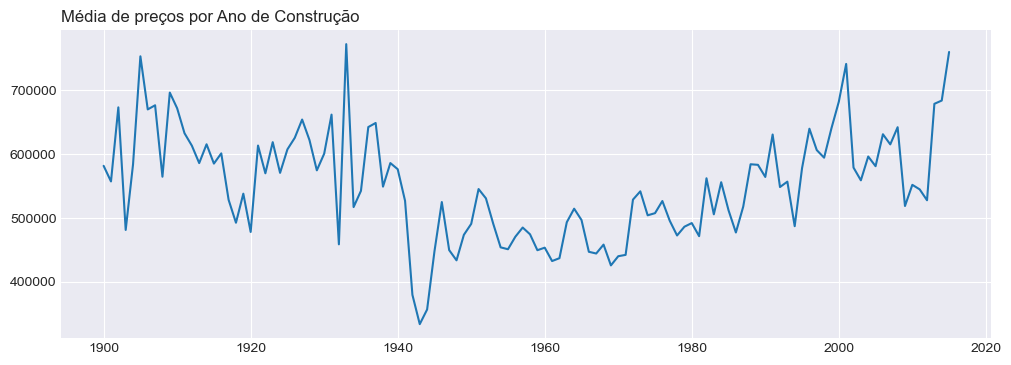

In [13]:
by_yr_built=data[['price','yr_built']].groupby('yr_built').mean().reset_index()

plt.figure(figsize=(12,4))
plt.style.use('seaborn-darkgrid')
plt.title('Média de preços por Ano de Construção',fontsize=12,loc='left')
plt.plot(by_yr_built['yr_built'],by_yr_built['price'])
plt.show()

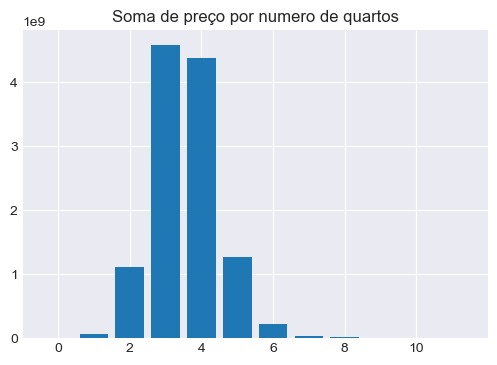

In [14]:
price_by_bedrooms=data[['price','bedrooms']].groupby('bedrooms').sum().reset_index()

plt.figure(figsize=(6,4))
plt.bar(price_by_bedrooms['bedrooms'],price_by_bedrooms['price'])
plt.title('Soma de preço por numero de quartos',fontsize=12,loc='center')
plt.show()

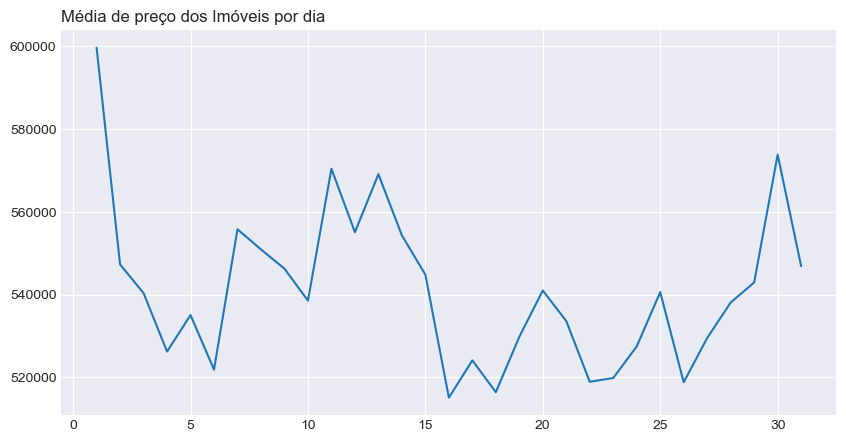

In [15]:
data['day']= pd.to_datetime(data['date']).dt.day
by_day=data[['price','day']].groupby('day').mean().reset_index()

plt.figure(figsize=(10,5))
plt.style.use('seaborn-darkgrid')
plt.title('Média de preço dos Imóveis por dia ',fontsize=12,loc='left')
plt.plot(by_day['day'],by_day['price'])

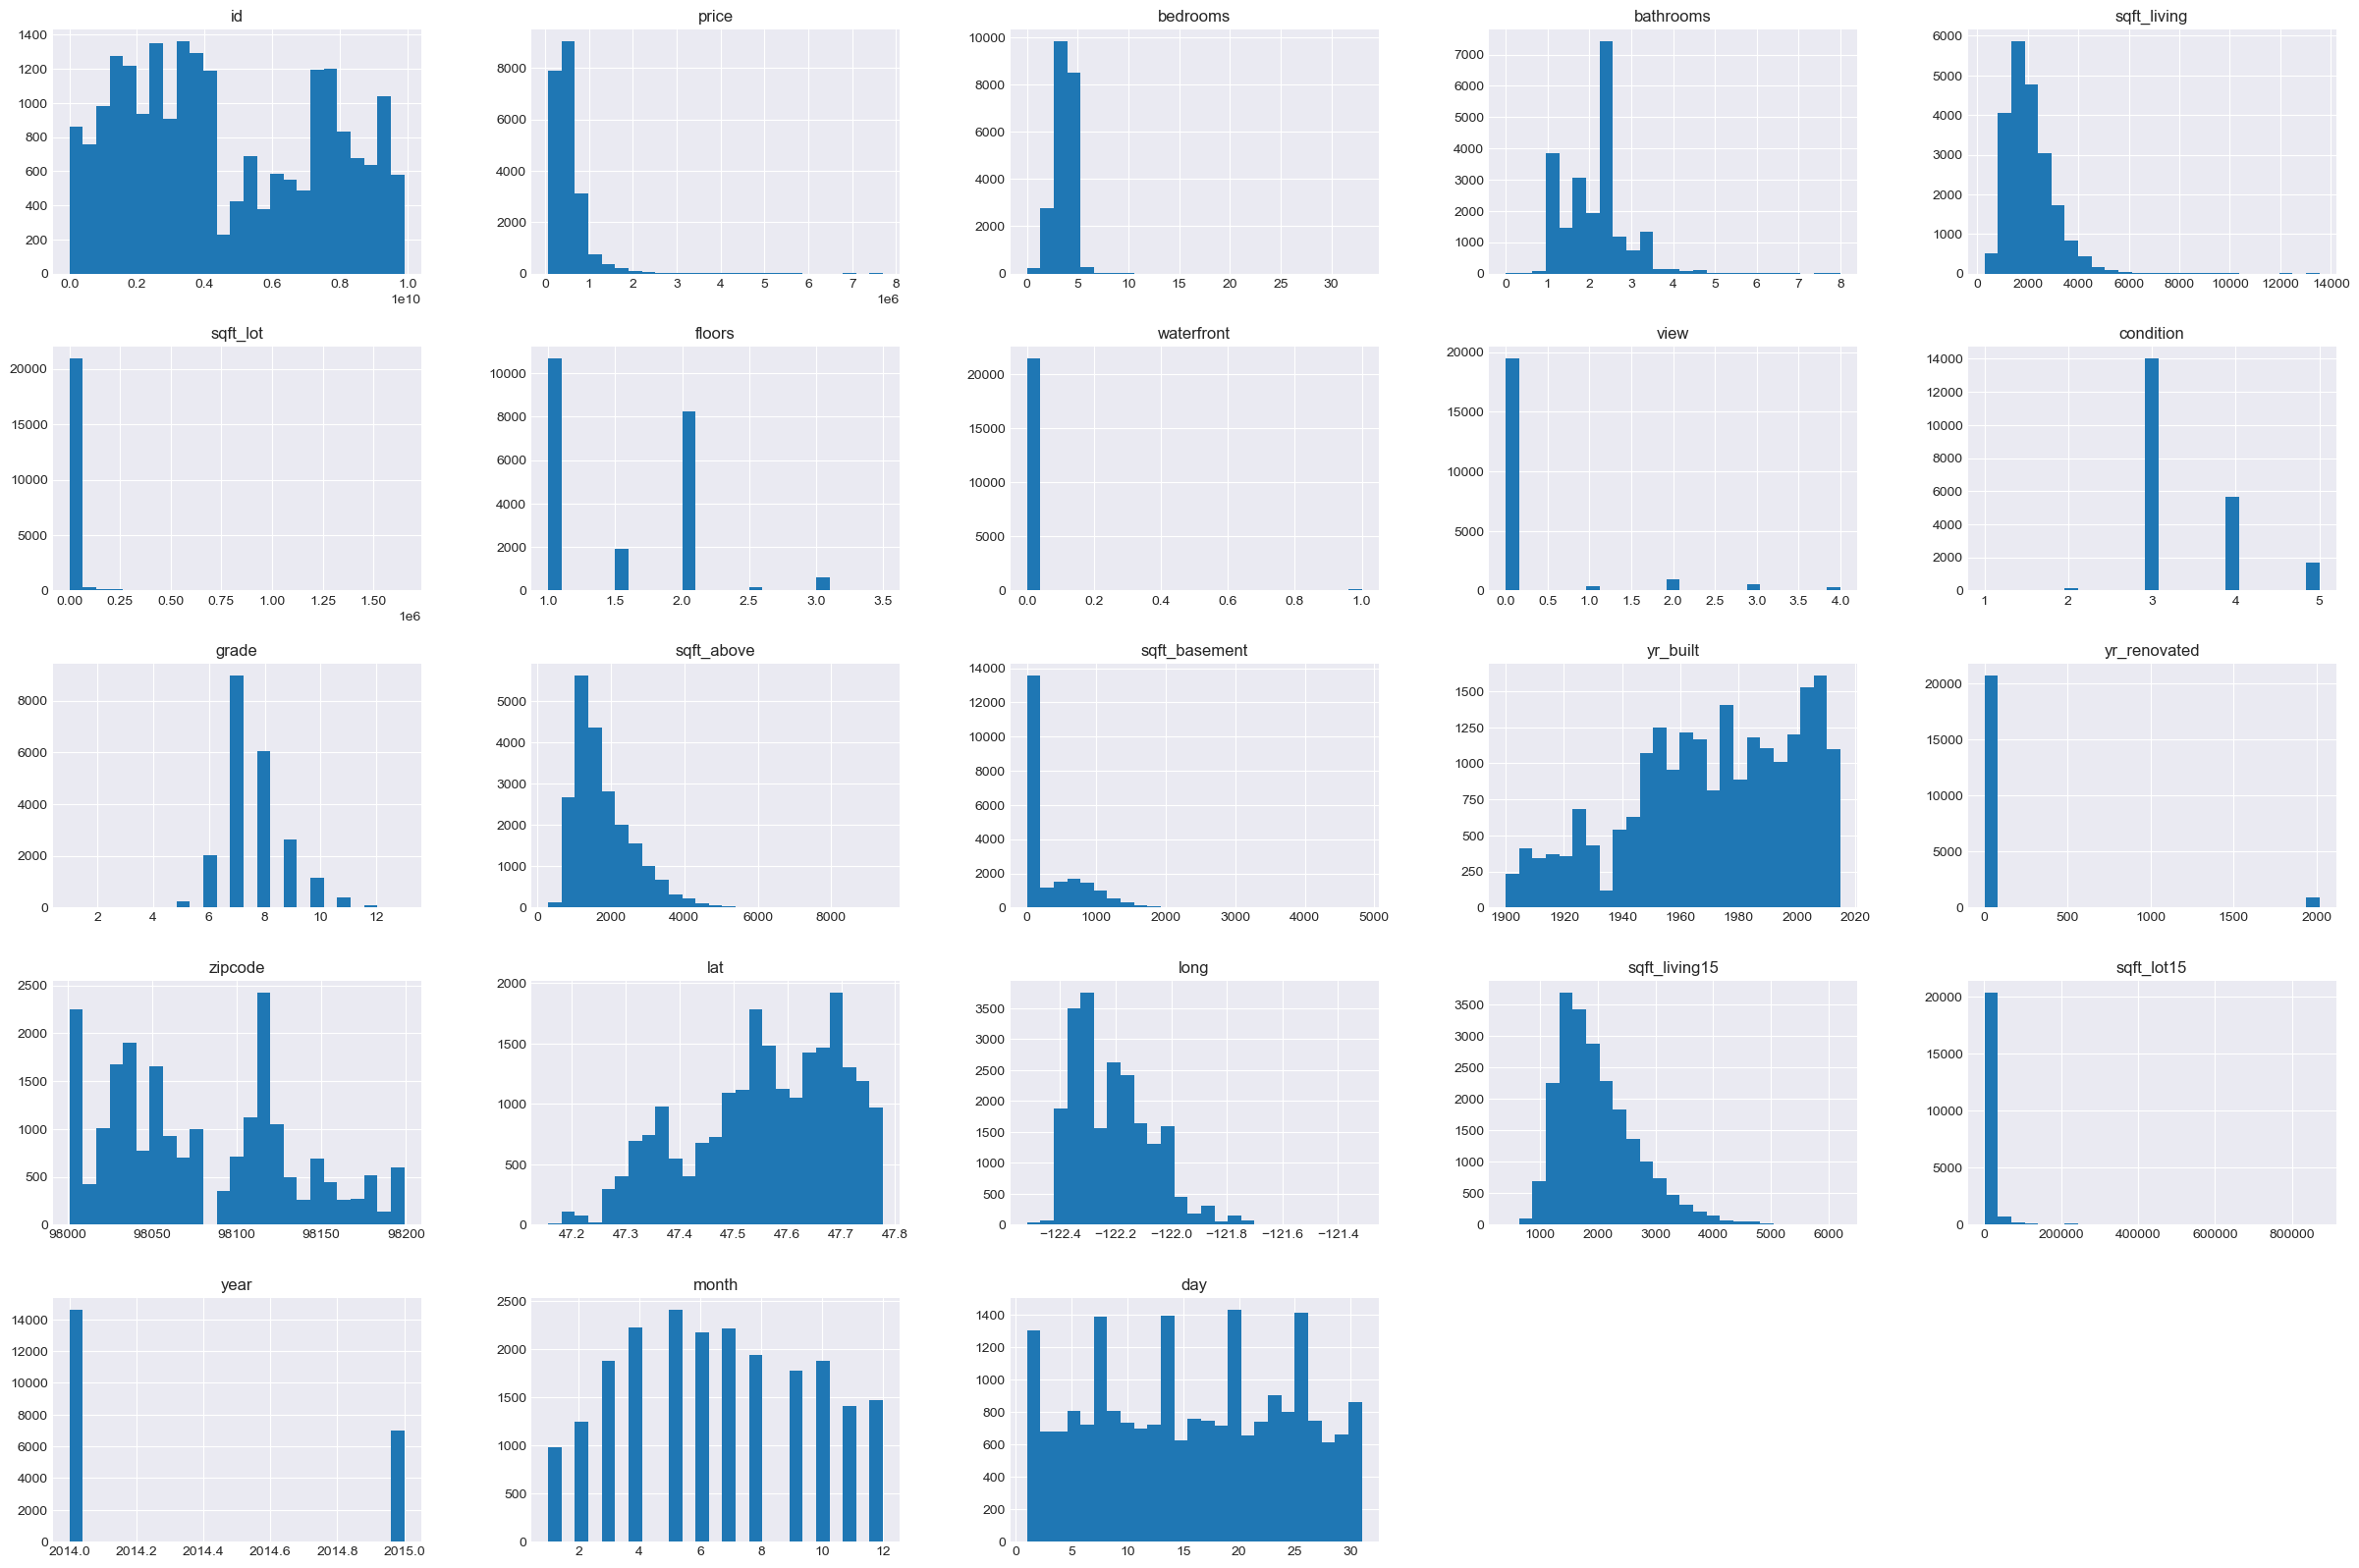

In [16]:
numeric_attributes.hist(figsize=(30,20),bins=25);


# Insights

In [17]:
# Setando os parãmetros para visualização dos gráficos

sns.set()

### H1. As casas aumentam 10% do valor a cada quantidade de quartos construidos. 

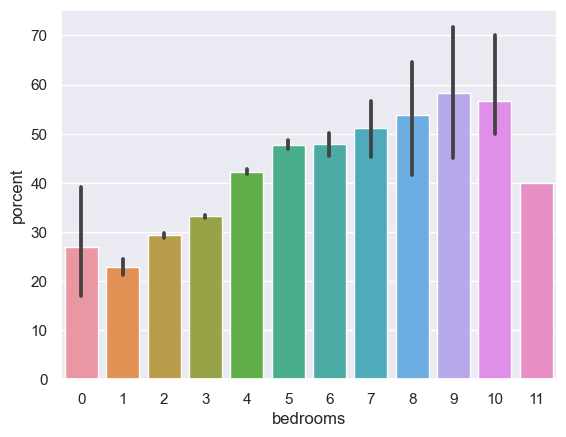

In [18]:
data['porcent']= data['price'].apply(lambda x: 10 if x <= 200000 else
                                            20 if (x > 200000) & (x <= 400000) else
                                            30 if (x > 200000) & (x <= 400000) else
                                            40 if (x > 400000) & (x <= 600000) else
                                            50 if (x > 600000) & (x <= 800000) else
                                            60 if (x > 800000) & (x <= 1000000) else 
                                            70 if (x > 1000000) & (x <= 1200000) else
                                            80
                                 )

sns.barplot(data = data, x='bedrooms',y ='porcent')
plt.ticklabel_format(style='plain', axis='y')


Falso: o numero de quartos influencia no preço mas é desproporcional.
    Entre 0 quartos e 1 o preço cai.
    Entre 5 e 6 quartos o preço se mantém.
    E de 10 a 11 quartos o preço volta a cair.

### H2. As casas vendidas no Verão são 20% mais caras em relação ao Inverno, na média.

In [19]:
aux = data[['season','price']].groupby('season').mean().reset_index()
aux

#sns.lineplot(data=aux, x='season', y='price', hue="season")

##calculo da porcentagem
#(aux['price'][2] - aux['price'][3]) / aux['price'][2] * 100

,season,price
0,fall,530846.52
1,spring,552603.24
2,summer,546767.23
3,winter,519221.24


Falso. As casas vendidas no verão são 5% mais caras em média.

### H3. Imóveis que possuem vista para água, são 30% mais caros, na média.

In [20]:
aux_w = data[['waterfront','price']].groupby('waterfront').mean().reset_index()
aux

#(aux_w['price'][0] - aux_w['price'][1]) / aux_w['price'][0] * 100

,season,price
0,fall,530846.52
1,spring,552603.24
2,summer,546767.23
3,winter,519221.24


Verdadeiro. Imoveis com vista para água são mais caros, ultrapassando a porcentagem de 200%. 

### H4. Imóveis sem porão possuem lote 50% maior do que com porão.

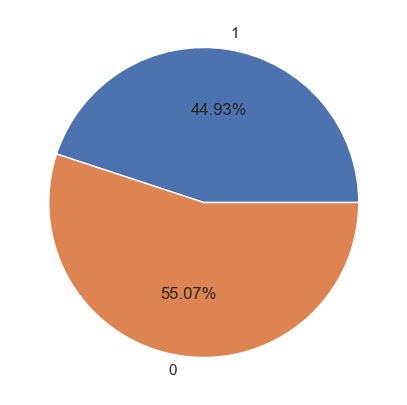

In [21]:
data['basement'] = data['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

# Agrupando por período
aux = data[['sqft_lot', 'basement']].groupby('basement').mean().sort_values('sqft_lot', ascending=True).reset_index()

fig, ax = plt.subplots(figsize =(5, 5))

ax.axis('equal')

ax.pie(aux['sqft_lot'], labels = aux['basement'],autopct='%1.2f%%')
plt.show()

#(aux['sqft_lot'][0] - aux['sqft_lot'][1]) / aux['sqft_lot'][0] * 100


Falso. Imoveis sem porão tem lote menor, em média 22.56%.

### H5. Imóveis com vista boa ou excelente são 30% mais caros, na média.

,view_quality,price
0,above average,515308.61
1,below average,1161189.60


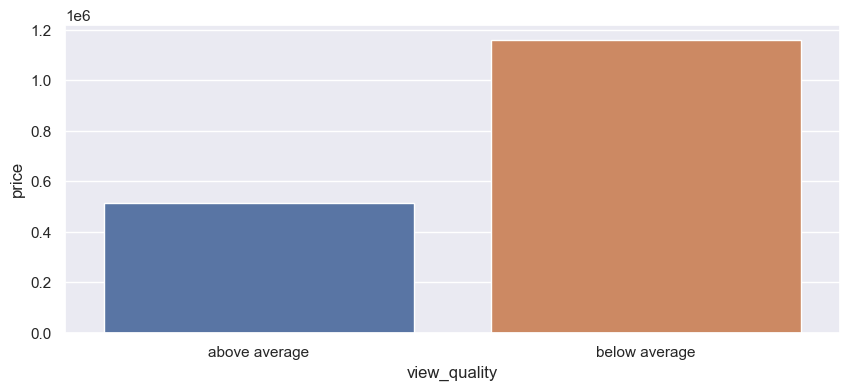

In [22]:
# Dividindo os imóveis pela qualidade da vista
data['view_quality'] = data['view'].apply(lambda x: 'above average' if x < 3 else 'below average')

aux = data[['view_quality','price']].groupby('view_quality').mean().reset_index()

plt.figure(figsize=(10,4))
sns.barplot(x='view_quality',y='price',data=aux);
aux

Verdadeiro. Imóveis com vista boa ou excelente são em média 125% mais caros.

### H6. Imóveis com qualidade de construção acima da média são 15% mais caros.

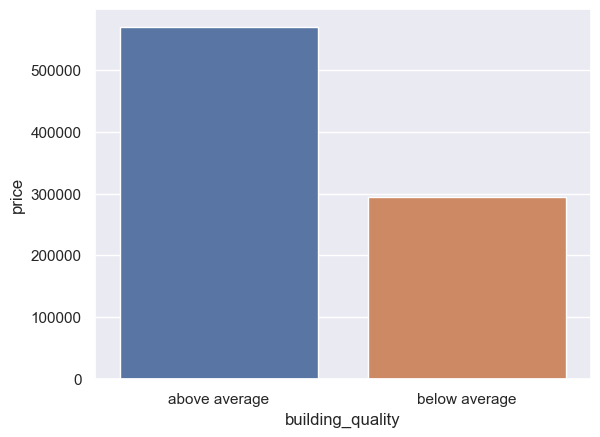

In [23]:
# Dividindo os imóveis pela qualidade de construção
data['building_quality'] = data['grade'].apply(lambda x: 'below average' if x < 7 else 'above average')

# Agrupando
aux = data[['price', 'building_quality']].groupby('building_quality').mean().reset_index()

sns.barplot(data=aux, x='building_quality', y='price')
plt.ticklabel_format(style='plain', axis='y');

Verdadeiro. Imóveis com qualidade de construção acima da média são 93% mais caros.



### H7.  Imóveis com 3 quartos tem um crescimento MoM (Month over Month) de 15%.

-0.2161700976066111

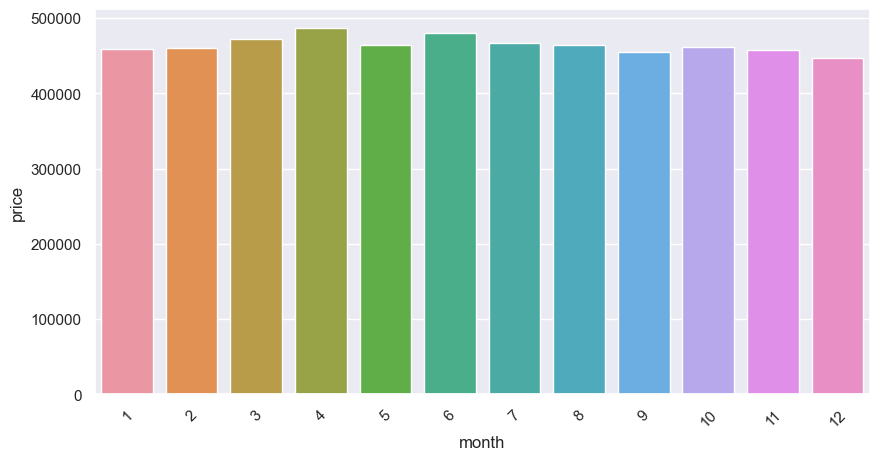

In [56]:
plt.figure(figsize=(10,5))

aux = data.loc[data['bedrooms'] == 3,['bedrooms','price', 'month']].groupby('month').mean().reset_index()

sns.barplot(data=aux, x='month', y='price')
plt.xticks(rotation = 45);

# porcentagem de venda em relação a cada mês anterior.
for i in range(0,len(aux)-1):
    aux.loc[i+1,'difference'] = (aux.loc[i+1,'price'] - aux.loc[i,'price'])/aux.loc[i,'price']*100
    
aux['difference']

# porcentagem de média dos valores por mês.
aux['pct'] = aux['price'].pct_change()* 100
aux['pct'].mean()

Falso. A média de crescimento MoM é de -0.22% (negativo).

### H8. Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.

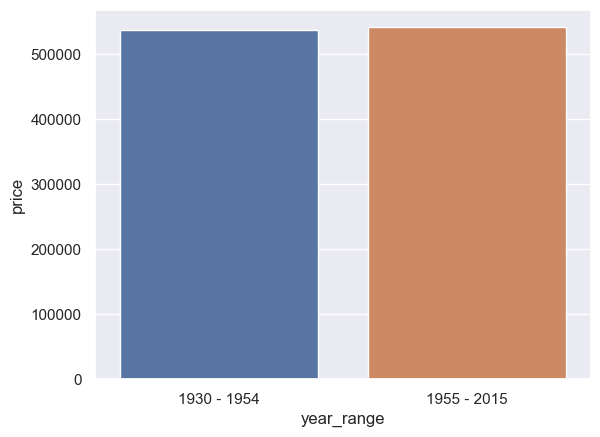

In [57]:
# Dividindo os imóveis no ano 1955
data['year_range'] = data['yr_built'].apply(lambda x: '1930 - 1954' if x < 1955 else '1955 - 2015')

# Agrupando por período
df_grouped = data[['price', 'year_range']].groupby('year_range').mean().reset_index()

sns.barplot(data=df_grouped, x='year_range', y='price')
plt.ticklabel_format(style='plain', axis='y')


Falso. Imóveis construídos após 1955 são em média 0.79% mais caros.

### H9. O crescimento do preço dos imóveis YoY (Year over Year) é de 10%.

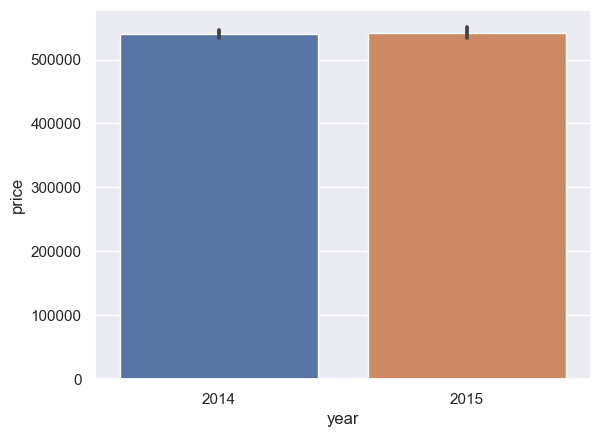

In [58]:
# Criando a coluna para ano
data['year'] = data['date'].dt.year

# Agrupando os anos e calculando a média
df_grouped = data[['price', 'year']].groupby('year').mean().reset_index()

sns.barplot(data=data, x='year', y='price');

#(df_grouped['price'][0] - df_grouped['price'][1]) / df_grouped['price'][0] *100

### H10. A cada andar, o valor dos imóveis aumentam em 15% .

0      NaN
1    26.42
2    16.08
3    63.41
4   -45.06
5    60.22
Name: difference, dtype: float64

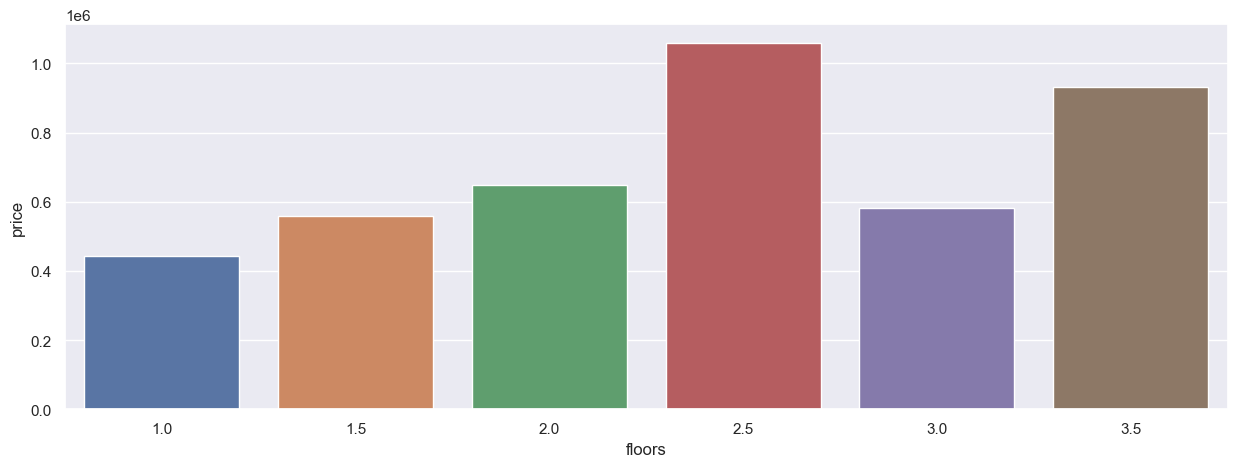

In [61]:
plt.figure(figsize=(15,5))
aux = data[['floors', 'price']].groupby('floors').mean().reset_index()

sns.barplot(x='floors',y='price',data=aux);

for i in range(0,len(aux)-1):
    aux.loc[i+1,'difference'] = (aux.loc[i+1,'price'] - aux.loc[i,'price'])/aux.loc[i,'price']*100
aux['difference']    

Verdadeiro. Em excessão aos imóveis com 3 quartos que tem queda nos valores.

# Perguntas de negócio

## 1. Quais são os imóveis que a House Rocket deveria comprar e por qual preço?

In [73]:
xdf = data.copy()

# Agrupando os imóveis por zipcode e determinano a mediana regional
regional_price = data[['price', 'zipcode']].groupby('zipcode').median().reset_index()
regional_price.columns = ['zipcode', 'regional_price']

# Juntando os preços regionais ao dataset
df = pd.merge(df, regional_price, how='inner', on='zipcode')

# Criando a coluna Status para recomendação
df['status'] = df.apply(lambda x: 'Buy' if ((x['price'] < x['regional_price']) &
                                                (x['condition'] >= 4)) else 'Do not buy', axis=1)

# Exportando a tabela com as recomendações
df.to_csv('recommendations.csv', index=False)

## 2. Uma vez o imóvel comprado, qual o melhor momento para vendê-lo e por qual preço?

In [74]:
df1= df[df['status']=='Buy'].copy()

# Agrupando os imóveis por zipcode e season
seasonal_price = df1[['price', 'zipcode', 'season']].groupby(['zipcode', 'season']).median().reset_index()
seasonal_price.columns = ['zipcode', 'season', 'seasonal_price']

# Incluindo os preços sazonais no dataset
df1 = pd.merge(df1, seasonal_price, how='inner', on=['zipcode', 'season'])

# Determinando o preço de venda com base na localização e mediana sazonal
df1['selling_price'] = df1.apply(lambda x: x['price']*1.3 if (x['price'] < x['seasonal_price']) else
                                x['price']*1.1, axis=1)

# Calculando o lucro
df1['revenue'] = df1.apply(lambda x: x['selling_price'] - x['price'], axis=1)

# Exportando a tabela com os valores de venda
df1 = df1.loc[:, ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
                  'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
                  'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'selling_price', 'revenue']]

df1.to_csv('selling_prices.csv')

# Resultados financeiros para o negócio

In [83]:
# Calculando a média de revenues
revenue_mean = df1['revenue'].mean()
round(revenue_mean)

71771

In [86]:
# Calculando a soma dos revenues de cada venda
revenue = df1['revenue'].sum()
round(revenue)

273304711